In [1]:
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import add
from tensorflow.keras.layers import Activation
from keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential , Model , load_model
from tensorflow.keras.models import load_model 

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

import cv2
from imutils import paths
import numpy as np
import os
import time
import warnings
warnings.filterwarnings("ignore")


Using TensorFlow backend.


In [3]:
#Dataset folder path
data = ("C:/Users/Kshitija/data")

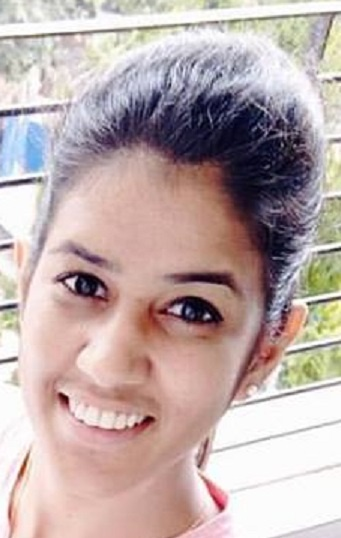

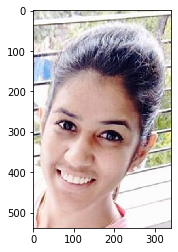

In [4]:
Img_Paths = list(paths.list_images(data))

#Displaying sample image from dataset
sample1 = Image.open(Img_Paths[9])
plt.imshow(sample1)
sample1


In [5]:
print(type(Img_Paths[1]))

<class 'str'>


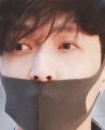

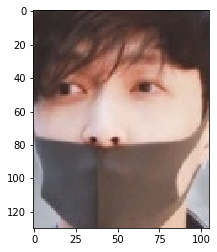

In [6]:
sample2 = Image.open(Img_Paths[-5])
plt.imshow(sample2)
sample2

In [7]:
#Initializing learning rate
INIT_LR = 0.0001
BATCH_SIZE = 32
EPOCHS = 20

#Getting all images and their labels in list
print("Loading images...")
Img_Paths = list(paths.list_images(data))
imgs = []
labels = []

#Looping over the image paths
for i in Img_Paths:
    #Extracting the class label
    label = i.split(os.path.sep)[-2]
    
    #Loading input image and processing it
    img = load_img(i,target_size=(224,224)) #Resizning all images with 224 Width and 224 height
    img = img_to_array(img) #Converting images to array
    img = preprocess_input(img)
    
    #updating imgs and labels respectively
    imgs.append(img)
    labels.append(label)
    
    
#Coverting imgs and labels to numpy array with float type
imgs = np.array(imgs,dtype="float32")
labels = np.array(labels)
print("...Done")


Loading images...
...Done


In [8]:
#Performing one-hot encoding on labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

#Splitting data into train and test

(X_train , X_test , y_train , y_test) = train_test_split(imgs,labels,test_size=0.20,stratify=labels,random_state=42)


#Constructing the generator for data augmentation

img_gen = ImageDataGenerator(rotation_range=40,
                            zoom_range=0.20,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.15,
                            horizontal_flip=True,
                            fill_mode="nearest")

print("Train size: ",len(X_train),"Test size: ",len(X_test))



Train size:  6042 Test size:  1511


In [9]:
model = Sequential()
model.add(Conv2D(512,(2,2),padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D((2,2),strides=2))

model.add(Conv2D(256,(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2),strides=2))

model.add(Conv2D(128,(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2),strides=2))

model.add(Conv2D(64,(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2),strides=2))

model.add(Conv2D(32,(2,2),padding="same",activation="relu"))
model.add(MaxPooling2D((2,2),strides=2))

#model.add(BatchNormalization())

model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(2,activation="softmax"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()


W0301 11:57:34.459886 10560 deprecation.py:506] From c:\users\kshitija\appdata\local\programs\python\python36\lib\site-packages\tensorflow_core\python\ops\resource_variable_ops.py:1630: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 512)     6656      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 512)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 256)     524544    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 128)       131200    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        3

In [ ]:
got